In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
year = 2015
tgt_stock = "SPY"
trade_freq = 3 # months
obs_period = 18 # trading days
initial_wealth = 1000

In [ ]:
startdate = str(year) + "-01-01"
enddate   = str(year) + "-12-31"
data = yf.download(tgt_stock, start=startdate, end=enddate)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,174.806793,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,171.649811,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,170.033081,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,172.151840,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,175.206665,147217800
...,...,...,...,...,...,...
2015-12-23,204.690002,206.070007,204.580002,206.020004,178.926407,110987200
2015-12-24,205.720001,206.330002,205.419998,205.679993,178.631134,48539600
2015-12-28,204.860001,205.259995,203.940002,205.210007,178.222900,65899900


2.Evaluate the daily moving average prices for the inputs given .

Print the moving average prices (to 2 decimal points) on the last trade date of every month in year clearly in your script clearly.

In [ ]:
# Convert the index to a NumPy array for easier indexing
dates = data.index
closing_prices = data['Close'].values

In [ ]:
dates

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2015-12-16', '2015-12-17', '2015-12-18', '2015-12-21',
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28',
               '2015-12-29', '2015-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [ ]:
# Calculate moving average
moving_avg = np.convolve(closing_prices, np.ones(obs_period)/obs_period, mode='valid')
moving_avg

array([202.78944482, 202.59833442, 202.47222307, 202.58888923,
       202.72944472, 202.6272227 , 202.73111131, 202.89222293,
       203.03388977, 203.36444516, 203.80388896, 204.20888858,
       204.63777754, 205.02833303, 205.25222185, 205.53055488,
       205.85222202, 206.32277764, 206.97111087, 207.5066664 ,
       208.16944461, 208.65500047, 209.05222321, 209.44444529,
       209.67277866, 209.94555664, 210.10500081, 210.19111209,
       210.08277893, 209.83722348, 209.68833499, 209.45055728,
       209.364446  , 209.25222439, 209.20889113, 209.11389075,
       209.03611332, 208.94555749, 208.8033354 , 208.53111267,
       208.15777927, 207.85889096, 207.74889119, 207.52500153,
       207.42500136, 207.31833479, 207.47666846, 207.63111284,
       207.68000115, 207.85055627, 207.9316669 , 207.99444411,
       207.94055515, 207.99222141, 207.98999871, 207.87610965,
       207.93333181, 208.14666579, 208.4444436 , 208.74555461,
       208.93444316, 209.17555491, 209.49444411, 209.72

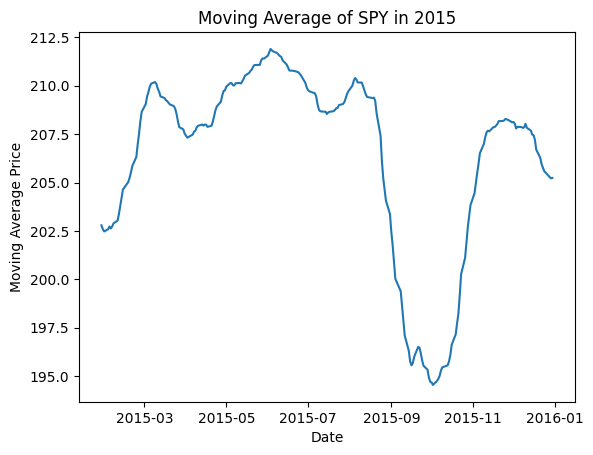

In [ ]:
plt.plot(dates[obs_period-1:], moving_avg)
plt.xlabel('Date')
plt.ylabel('Moving Average Price')
plt.title('Moving Average of ' + tgt_stock + ' in ' + str(year))
plt.show()


In [ ]:
dates[0]

Timestamp('2015-01-02 00:00:00')

In [ ]:
# Find the last trading day of each month
last_trade_dates = []
current_month = dates[0].month
for i in range(len(dates)):
  if dates[i].month != current_month:
    last_trade_dates.append(dates[i-1])
    current_month = dates[i].month
last_trade_dates.append(dates[-1])

# Print the last trade dates
print("Last trading dates of each month:")
for date in last_trade_dates:
  print(date)

Last trading dates of each month:
2015-01-30 00:00:00
2015-02-27 00:00:00
2015-03-31 00:00:00
2015-04-30 00:00:00
2015-05-29 00:00:00
2015-06-30 00:00:00
2015-07-31 00:00:00
2015-08-31 00:00:00
2015-09-30 00:00:00
2015-10-30 00:00:00
2015-11-30 00:00:00
2015-12-30 00:00:00


In [ ]:
# Print the moving average prices (to 2 decimal points) on the last trade date of every month in year clearly
mov_avg_date = []
for date in last_trade_dates:
  idx = dates.get_loc(date)
  mv_avg = moving_avg[idx - obs_period + 1]
  close_val = data.loc[date]['Close']
  temp_list = [date,mv_avg,close_val]
  mov_avg_date.append(temp_list)
  print(f"{date}: {mv_avg:.2f}")

2015-01-30 00:00:00: 202.47
2015-02-27 00:00:00: 208.66
2015-03-31 00:00:00: 207.53
2015-04-30 00:00:00: 209.76
2015-05-29 00:00:00: 211.40
2015-06-30 00:00:00: 209.90
2015-07-31 00:00:00: 209.71
2015-08-31 00:00:00: 203.37
2015-09-30 00:00:00: 194.71
2015-10-30 00:00:00: 203.84
2015-11-30 00:00:00: 208.11
2015-12-30 00:00:00: 205.24


In [ ]:
mov_avg_date = np.array(mov_avg_date)
print(mov_avg_date)

[[Timestamp('2015-01-30 00:00:00') 202.4722230699327 199.4499969482422]
 [Timestamp('2015-02-27 00:00:00') 208.65500047471787 210.66000366210938]
 [Timestamp('2015-03-31 00:00:00') 207.5250015258789 206.42999267578125]
 [Timestamp('2015-04-30 00:00:00') 209.7588890923394 208.4600067138672]
 [Timestamp('2015-05-29 00:00:00') 211.39944458007812 211.13999938964844]
 [Timestamp('2015-06-30 00:00:00') 209.90055508083765 205.85000610351562]
 [Timestamp('2015-07-31 00:00:00') 209.7138875325521 210.5]
 [Timestamp('2015-08-31 00:00:00') 203.37111239963107 197.6699981689453]
 [Timestamp('2015-09-30 00:00:00') 194.70611063639322 191.6300048828125]
 [Timestamp('2015-10-30 00:00:00') 203.83555603027344 207.92999267578125]
 [Timestamp('2015-11-30 00:00:00') 208.10999976264105 208.69000244140625]
 [Timestamp('2015-12-30 00:00:00') 205.2366655137804 205.92999267578125]]


**3.** Evaluate the dates and closing prices when buy transactions are to happen.

Report clearly, the buy dates and closing prices of tgt_stock in your script.

In [ ]:
# prompt: In variable mov_avg_date, the first column is the date, the second is the moving average and the third is the closing value of the stock. If the value of the close is less than the moving average, that day we should buy else it be sell. create a new column with 'Sell' & 'Buy' values and add it to mov_avg_date numpy.

mov_avg_date = np.insert(mov_avg_date, 3, 'Hold', axis=1)
for i in range(len(mov_avg_date)):
  if mov_avg_date[i][1] > mov_avg_date[i][2]:
    mov_avg_date[i][3] = 'Buy'
  else:
    mov_avg_date[i][3] = 'Sell'

print(mov_avg_date)


[[Timestamp('2015-01-30 00:00:00') 202.4722230699327 199.4499969482422
  'Buy']
 [Timestamp('2015-02-27 00:00:00') 208.65500047471787 210.66000366210938
  'Sell']
 [Timestamp('2015-03-31 00:00:00') 207.5250015258789 206.42999267578125
  'Buy']
 [Timestamp('2015-04-30 00:00:00') 209.7588890923394 208.4600067138672
  'Buy']
 [Timestamp('2015-05-29 00:00:00') 211.39944458007812 211.13999938964844
  'Buy']
 [Timestamp('2015-06-30 00:00:00') 209.90055508083765 205.85000610351562
  'Buy']
 [Timestamp('2015-07-31 00:00:00') 209.7138875325521 210.5 'Sell']
 [Timestamp('2015-08-31 00:00:00') 203.37111239963107 197.6699981689453
  'Buy']
 [Timestamp('2015-09-30 00:00:00') 194.70611063639322 191.6300048828125
  'Buy']
 [Timestamp('2015-10-30 00:00:00') 203.83555603027344 207.92999267578125
  'Sell']
 [Timestamp('2015-11-30 00:00:00') 208.10999976264105 208.69000244140625
  'Sell']
 [Timestamp('2015-12-30 00:00:00') 205.2366655137804 205.92999267578125
  'Sell']]


In [ ]:
# prompt: print only rows of mov_avg_date which has buy option, with decimal format to 2 digits

buy_dates = []
for row in mov_avg_date:
  if row[3] == 'Buy':
    buy_dates.append(row)
    print(f"{row[0]}: {row[1]:.2f} {row[2]:.2f} {row[3]}")

buy_dates = np.array(buy_dates)

2015-01-30 00:00:00: 202.47 199.45 Buy
2015-03-31 00:00:00: 207.53 206.43 Buy
2015-04-30 00:00:00: 209.76 208.46 Buy
2015-05-29 00:00:00: 211.40 211.14 Buy
2015-06-30 00:00:00: 209.90 205.85 Buy
2015-08-31 00:00:00: 203.37 197.67 Buy
2015-09-30 00:00:00: 194.71 191.63 Buy


In [ ]:
sell_dates = []
for row in mov_avg_date:
  if row[3] == 'Sell':
    sell_dates.append(row)
    print(f"{row[0]}: {row[1]:.2f} {row[2]:.2f} {row[3]}")

sell_dates = np.array(sell_dates)

2015-02-27 00:00:00: 208.66 210.66 Sell
2015-07-31 00:00:00: 209.71 210.50 Sell
2015-10-30 00:00:00: 203.84 207.93 Sell
2015-11-30 00:00:00: 208.11 208.69 Sell
2015-12-30 00:00:00: 205.24 205.93 Sell


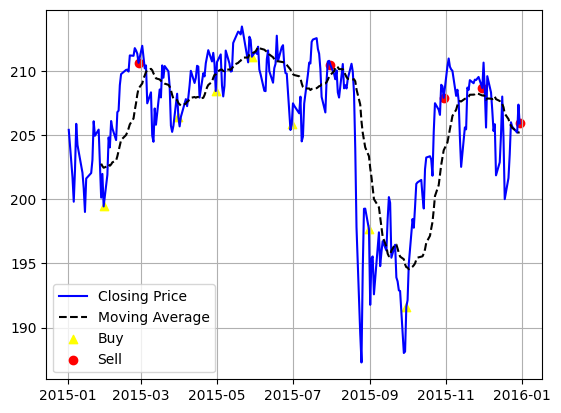

In [ ]:
# prompt: on the moving average plot put a grey triangle on the buy date and a red circle on the sell date. Plot closing dates in blue line and moving average as a black dotted line. show legend also.

# Create the plot
fig, ax = plt.subplots()

# Plot the closing prices in blue
ax.plot(dates, closing_prices, color='blue', label='Closing Price')

# Plot the moving average in black dotted line
ax.plot(dates[obs_period-1:], moving_avg, color='black', linestyle='--', label='Moving Average')

# Plot points with marker triangle (green)
ax.scatter(buy_dates[:,0], buy_dates[:,2], c='yellow', marker='^', label='Buy')

# Plot points with marker circle (red)
ax.scatter(sell_dates[:,0], sell_dates[:,2], c='red', marker='o', label='Sell')

# Add legend
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: print only rows from mov_avg_date as per trade_freq duration

trade_dates = mov_avg_date[trade_freq-1::trade_freq]
for row in trade_dates:
  print(f"{row[0]}: {row[1]:.2f} {row[2]:.2f} {row[3]}")


2015-03-31 00:00:00: 207.53 206.43 Buy
2015-06-30 00:00:00: 209.90 205.85 Buy
2015-09-30 00:00:00: 194.71 191.63 Buy
2015-12-30 00:00:00: 205.24 205.93 Sell


**5**. Evaluate the financial return from the multiple pairs of transactions in Questions 4 and 5.

Hence, report clearly, the final wealth of the strategy, corrected to 2 decimal points in your script.

In [ ]:
# prompt: We need to start from initial_wealth and trade_dates ndarray. For each "Sell", profit per share will be the current row 'close' amount (column 3) minus the next row 'close' amount (column 3 ). The total shares we can buy is initial_wealth divided by the current row 'close' amount (column 3). Profit is above total shares multiplied by profit per share. Add this profit amount to initial_wealth. For

initial_wealth = 1000

for i in range(len(trade_dates)-1):
  current_close = trade_dates[i][2]
  next_close = trade_dates[i + 1][2]
  print(current_close,next_close)
  if trade_dates[i][3] == 'Buy':
    profit_per_share = current_close - next_close
  else:
    profit_per_share = next_close - current_close

  print(profit_per_share)

  total_shares = initial_wealth / current_close
  print(total_shares)

  profit = total_shares * profit_per_share
  print(profit)

  initial_wealth += profit

  print(f"Final wealth: {initial_wealth:.2f}")
  print('++++++++++++++++++++++++')


206.42999267578125 205.85000610351562
0.579986572265625
4.844257305044811
2.809604189525654
Final wealth: 1002.81
++++++++++++++++++++++++
205.85000610351562 191.6300048828125
14.220001220703125
4.871554891697421
69.27351650665962
Final wealth: 1072.08
++++++++++++++++++++++++
191.6300048828125 205.92999267578125
-14.29998779296875
5.594547270151124
-80.00195767034772
Final wealth: 992.08
++++++++++++++++++++++++


In [ ]:
# prompt: select from trade_dates only rows where column 3 is 'Buy'

trade_dates[trade_dates[:, 3] == 'Buy'][:,0]


array([Timestamp('2015-03-31 00:00:00'), Timestamp('2015-06-30 00:00:00'),
       Timestamp('2015-09-30 00:00:00')], dtype=object)

**6.** Recreate Figure 1 with the strategy inputs given in Figure 2.

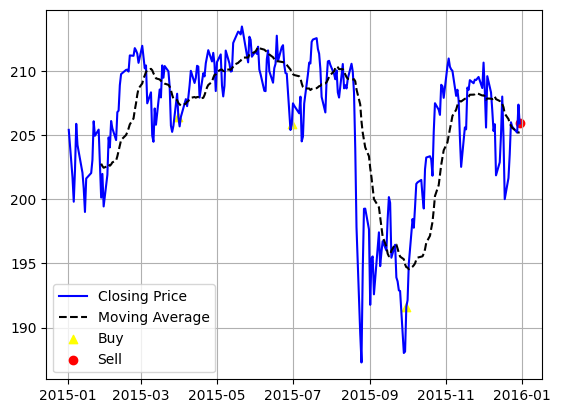

In [ ]:
# Create the plot
fig, ax = plt.subplots()

# Plot the closing prices in blue
ax.plot(dates, closing_prices, color='blue', label='Closing Price')

# Plot the moving average in black dotted line
ax.plot(dates[obs_period-1:], moving_avg, color='black', linestyle='--', label='Moving Average')

# Plot points with marker triangle (green)
ax.scatter(trade_dates[trade_dates[:, 3] == 'Buy'][:,0], trade_dates[trade_dates[:, 3] == 'Buy'][:,2], c='yellow', marker='^', label='Buy')

# Plot points with marker circle (red)
ax.scatter(trade_dates[trade_dates[:, 3] == 'Sell'][:,0], trade_dates[trade_dates[:, 3] == 'Sell'][:,2], c='red', marker='o', label='Sell')

# Add legend
plt.legend()
plt.grid(True)
plt.show()